In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [12]:
# importando datasets
df_train = pd.read_csv("portfolio_ok.csv", index_col='id')
df_test  = pd.read_csv("marketok.csv", index_col='id')

## Kmeans de 40 clusters c/ data_portifolios - check n_clusters

In [14]:
# Rodando o Kmeans com for para identificar o numero de clusters vs erro de classificação
X_train = df_train
y_test = df_train['target']

In [15]:
error_rate = []

for i in range(1,40):     # Levará algum tempo
    
    km1 = KMeans(n_clusters=i)
    km1.fit(X_train)
    pred_i = km1.predict(X_train)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

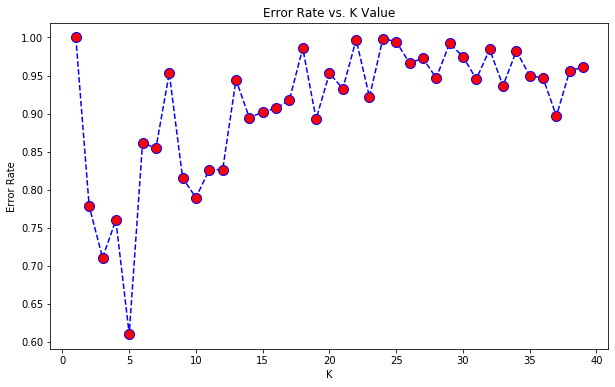

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Defini-se a quantidade de clusters: 5

## Kmeans com x clusters para solução final
Escolhe-se o numero de Cluster e roda-se novamente o Kmeans para operação com o data_market

In [17]:
km2 = KMeans(n_clusters=5)

In [18]:
km2.fit(df_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# acho que aqui é o resultado
km2.predict(df_test)

462298

In [20]:
km2.cluster_centers_

array([[ 2.17241379e+00,  1.63620690e+01,  6.43965517e+00,
         5.22413793e+00,  3.24137931e+00,  2.61206897e+00,
         3.37931034e+00,  2.55172414e+00,  3.37931034e+00,
        -9.91111606e-02, -5.88385520e-02, -7.08449409e-02,
        -7.07064843e-02,  4.65517241e-01,  1.01220566e+00,
         5.77586207e-01,  1.96551724e+00],
       [ 5.36687631e+00,  4.67085954e+00,  9.81551363e+00,
         5.63102725e+00,  2.89517820e+00,  2.78406709e+00,
         3.30188679e+00,  2.16142558e+00,  3.30188679e+00,
        -2.06410412e-02, -5.63070817e-02, -6.70443604e-02,
        -4.34636310e-02,  6.39412998e-01,  7.97498370e-01,
         1.48218029e+00,  1.69811321e+00],
       [ 1.47669903e+01,  6.90291262e+00,  5.09708738e-01,
         4.23786408e+00,  4.53398058e+00,  2.71844660e+00,
         3.70873786e+00,  3.88349515e+00,  3.70873786e+00,
         1.05364093e-01, -5.84422410e-02, -1.23326921e-01,
        -4.94329755e-02,  4.17475728e-01,  2.36723598e+00,
         2.99029126e+00,  2.8

In [25]:
km2.labels_

1278